In [1]:
%matplotlib inline

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Wedge, Circle
import cartopy.crs as ccrs
import numpy as np

from geopack import geopack

Load IGRF coefficients ...


In [2]:
def dual_half_circle(center=(0,0), radius=1, angle=90, ax=None, colors=('w','k','k'),
                     **kwargs):
    """
    Add two half circles to the axes *ax* (or the current axes) with the 
    specified facecolors *colors* rotated at *angle* (in degrees).
    """
    if ax is None:
        ax = plt.gca()
    theta1, theta2 = angle, angle + 180
    #w1 = Wedge(center, radius, theta1, theta2, fc=colors[0], **kwargs)
    #w2 = Wedge(center, radius, theta2, theta1, fc=colors[1], **kwargs)
    
    w1 = Wedge(center, radius, theta1, theta2, fc=colors[1], **kwargs)
    w2 = Wedge(center, radius, theta2, theta1, fc=colors[0], **kwargs)
   
    cr = Circle(center, radius, fc=colors[2], fill=False, **kwargs)
    for wedge in [w1, w2, cr]:
        ax.add_artist(wedge)
    return [w1, w2, cr]

def setup_fig(xlim=(10,-30),ylim=(-20,20),xlabel='X GSM [Re]',ylabel='Z GSM [Re]'):

    fig = plt.figure(figsize=(15,10))
    ax  = fig.add_subplot(111)
    ax.axvline(0,ls=':',color='k')
    ax.axhline(0,ls=':',color='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.set_aspect('equal')
    w1,w2,cr = dual_half_circle(ax=ax)
    
    return ax
# ax = setup_fig(xlim=(-10,10),ylim=(-10,10))

# Observatory Locations

# Convert Lat-Lon to GSM

In [31]:
obs_lat, obs_lon, name = -77.85, 166.67, 'MCM'
ut = 15 # Hours 0-24
ps = geopack.recalc(ut)

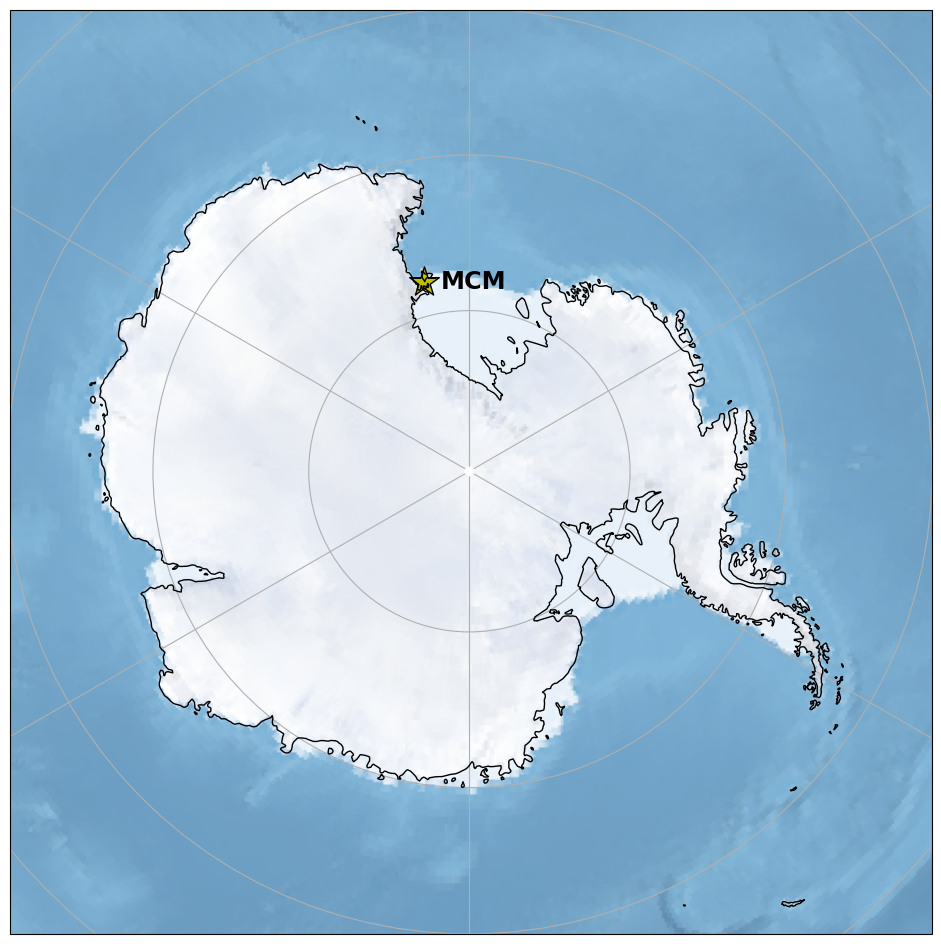

In [32]:
# From CartoPy Example: https://scitools.org.uk/cartopy/docs/latest/gallery/aurora_forecast.html#sphx-glr-gallery-aurora-forecast-py
fig = plt.figure(figsize=[12, 12])

projection = ccrs.Orthographic(180, -90)
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.coastlines(zorder=3)
ax.stock_img()
ax.gridlines()

pxx,pyy = projection.transform_point(obs_lon,obs_lat,ccrs.Geodetic())

ax.scatter([pxx],[pyy],marker='*',facecolor='y',edgecolor='k',s=500)
plt.annotate(name, xy=(pxx,pyy),xytext=(12, 0),va='center',textcoords='offset points',
             fontsize='xx-large',fontweight='bold')

ax.set_extent([0, 359.9999, -90, -60],crs=ccrs.PlateCarree())

plt.show()

In [33]:
lat_rad = np.deg2rad(obs_lat)
lon_rad = np.deg2rad(obs_lon)

# Convert Geodetic to Geocentric Spherical
r, theta_rad = geopack.geodgeo(0,lat_rad,1)

# Convert Geocentric Spherical to Geocentric Cartesian
x_gc,y_gc,z_gc = geopack.sphcar(1,theta_rad,lon_rad,1)
print('GC:  ', x_gc,y_gc,z_gc,' R=',np.sqrt(x_gc**2+y_gc**2+z_gc**2))

# Convert Geocentric Cartesian to GSM
x_gsm,y_gsm,z_gsm = geopack.geogsm(x_gc,y_gc,z_gc,1)
print('GSM: ', x_gsm,y_gsm,z_gsm,' R=',np.sqrt(x_gsm**2+y_gsm**2+z_gsm**2))

GC:   -0.20611981249548222 0.0488386279910637 -0.9773072246293781  R= 1.0
GSM:  0.5717688646764261 0.12036738791151495 -0.8115368490179542  R= 1.0


# Field Line Trace

In [34]:
x,y,z,xx,yy,zz = geopack.trace(x_gsm,y_gsm,z_gsm,dir=-1,rlim=100,r0=.99999,parmod=2,exname='t89',inname='igrf',maxloop=10000)

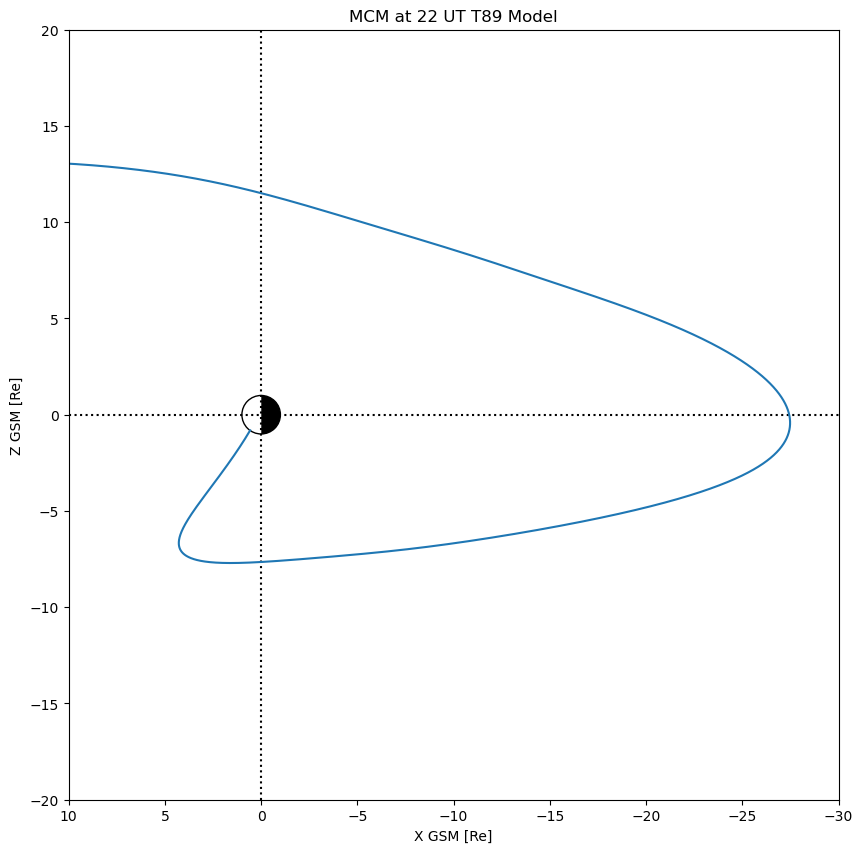

In [35]:
ax=setup_fig()
ax.plot(xx,zz)
plt.title('MCM at 22 UT T89 Model')
plt.show()